# Homework 2: mask detection for the next pandemic
You heard rumors from biology department of EPFL about a new version of a corona virus spreading out next year, already called COVID-25. The virus is so dangerous that you are asked to develop a mask detection system to be deployed in all public places. The system should be able to detect if a person is wearing a mask or not. You are given a dataset of images of people with and without masks. Your task is to develop a machine learning model that can detect if a person is wearing a mask or not.

**IMPORTANT NOTE:** The evaluation of this homework will be done on an hidden dataset. It is important that your notebook runs without errors, otherwise we will not be able to evaluate some questions, resulting in a grade 0 for that part. Make sure to double check your code before submitting the notebook. We provide a simple `evaluate` function that you can use to make sure that all the necessary functions are implemented correctly; the function will warn you if it detects that a good prediction cannot be made. `evaluate` takes just one argument: the `scikit-learn` model that you have trained. It expects the model to have a `predict` method that works on a numpy array.

In [55]:
from evaluation import evaluate

## Data loading and preprocessing
The dataset consists in $n$ images of dimension 128x128 pixels. Each pixel is represented by 3 values (RGB). The dataset is divided in two classes: 0 for people with the mask and 1 for people without the mask. 

In [2]:
import numpy as np
import sklearn

def load_file(file):
    with np.load('data/'+file+'.npz') as data:
        X = data['X']
        y = data['y']
    return X, y

X, y = load_file('train')
print(X.shape, y.shape)

(188, 3, 128, 128) (188,)


In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit


**Question 1.** Plot few images, and check the distribution of the labels.

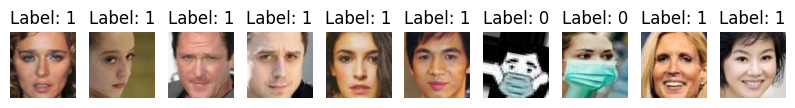

In [5]:
num_images = 10
X_T = X.transpose(0, 2, 3, 1)
plt.figure(figsize=(10, 2))
for i in range(num_images):
    ax = plt.subplot(1, num_images, i + 1)
    plt.imshow(X_T[i])
    plt.title(f"Label: {y[i]}")
    plt.axis("off")
plt.show()

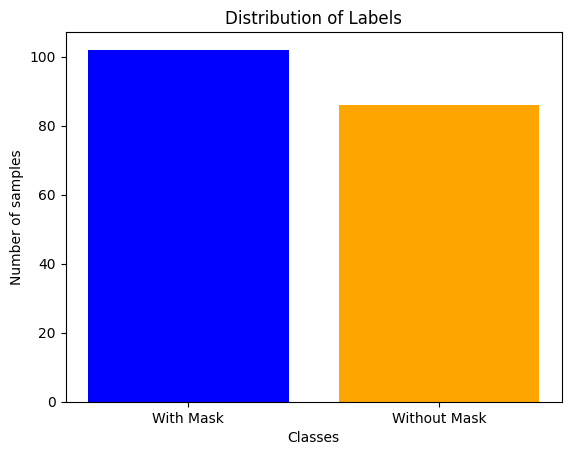

In [6]:
labels, counts = np.unique(y, return_counts=True)
plt.bar(labels, counts, tick_label=["With Mask", "Without Mask"], color=['blue', 'orange'])
plt.xlabel("Classes")
plt.ylabel("Number of samples")
plt.title("Distribution of Labels")
plt.show()

**Question 2.** Reshape each image in the dataset to a flat vector. Split the dataset into training and test sets.

In [17]:
X = X.reshape((X.shape[0], -1))
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
print('Train:')
print(X_train.shape)
print(y_train.shape)
print('Test:')
print(X_test.shape)
print(y_test.shape)

Train:
(131, 49152)
(131,)
Test:
(57, 49152)
(57,)


## Logistic regression

**Question 3.** Train a logistic regression model on the training data, comparing the accuracies of $\ell_1$ and $\ell_2$ penalties. What is the train and test accuracy of the model?

In [37]:
model = LogisticRegression(C=1e5, tol=0.1, penalty='l2', solver='liblinear')  # Leave default setting because binary classification
model.fit(X_train, y_train)
score_train = model.score(X_train, y_train)
score_test = model.score(X_test, y_test)

print(f'Train accuracy: {score_train}')
print(f"Test accuracy: {score_test}")

Train accuracy: 1.0
Test accuracy: 0.8421052631578947


In [38]:
# Evaluate the model
evaluate(model)
# Make sure the line above runs without errors before submitting your solution!

All good, you are ready for HomeWork submission! The accuracy on 'train' is:  0.9042553191489362


**Question 4.** Make a more extensive search of possible Logistic Regressors. Crossvalidate the following parameters:
- penalty: `['l1', 'l2']`
- $C$: range from $10^{-3}$ to $10^3$.


In [39]:
param_grid = [
    {'C': np.array([10**-3, 10**-2, 10**-1, 1, 10**1, 10**2, 10**3]), 'penalty': ['l1', 'l2']} 
]

cv = ShuffleSplit(n_splits=4, test_size=0.20, random_state=1)
logistic_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, n_jobs=-1 )
logistic_model.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=4, random_state=1, test_size=0.2, train_size=None),
             estimator=LogisticRegression(C=100000.0, solver='liblinear',
                                          tol=0.1),
             n_jobs=-1,
             param_grid=[{'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'penalty': ['l1', 'l2']}])

In [47]:
best_score = logistic_model.best_score_
best_param = logistic_model.best_params_

print(f"Best score: {best_score} Parameter {best_param}")

Best score: 0.9444444444444444 Parameter {'C': 1.0, 'penalty': 'l1'}


In [46]:
# Official evaluation!
evaluate(logistic_model)
# Make sure the line above runs without errors before submitting your solution!

All good, you are ready for HomeWork submission! The accuracy on 'train' is:  0.925531914893617


## SVM
**Question 4.** Train a linear SVM model on the training data and crossvalidate the parameter $C$.

In [33]:
from sklearn.svm import LinearSVC

In [48]:
svm_model = LinearSVC(loss='hinge',max_iter=10000,C=0.01)
svm_model.fit(X_train, y_train)
svm_model.score(X_test,y_test)

0.8245614035087719

In [50]:
# Cross Validation
param_grid = [
    {'C': np.array([10**-3, 10**-2, 10**-1, 1, 10**1, 10**2, 10**3])} 
]
cv = ShuffleSplit(n_splits=4, test_size=0.20, random_state=1)
cv_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=cv, n_jobs=-1 )
cv_svm.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=4, random_state=1, test_size=0.2, train_size=None),
             estimator=LinearSVC(C=0.01, loss='hinge', max_iter=10000),
             n_jobs=-1,
             param_grid=[{'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}])

In [51]:
best_score = cv_svm.best_score_
best_param = cv_svm.best_params_

print(f"Best score: {best_score} Parameter {best_param}")

Best score: 0.9351851851851851 Parameter {'C': 0.001}


In [52]:
# Official evaluation!
evaluate(svm_model)
# Make sure the line above runs without errors before submitting your solution!

All good, you are ready for HomeWork submission! The accuracy on 'train' is:  0.8936170212765957


## Random Forest

**Question 5.** Train a Random Forest model on the training data and crossvalidate the parameters:
- `n_estimators`
- `max_depth`
- `criteria`



In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
parameters = [{'max_depth': np.arange(1, 20), 'n_estimators': np.arange(90,110), 'criterion': ['gini', 'entropy', 'log_loss']}]
rf_model = GridSearchCV(
    rf_model,
     parameters
     )
rf_model.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
# Official evaluation!
evaluate(rf_model)
# Make sure the line above runs without errors before submitting your solution!

## Extra data
Digging in his archive, EPFL Health autorities found a another dataset of images with the same format. This dataset is called `extratrain`. Use this dataset to improve the performance of your models.

In [37]:
X_extra, y_extra = load_file('extra')

**Question 6.** Is this new dataset good? What problem does it have compared to the original dataset, if any?

**Question 7.** Evaluate the performance of the cross-validated models you found in the previous questions on the new dataset. Is the performance better or worse? Why?

**Question 8.** Train the most promising model using the new dataset, and crossvalidate. Is the performance better or worse? Why?

In [ ]:
# Official evaluation!
evaluate(newrf_model)
# Make sure the line above runs without errors before submitting your solution!

**Question 9:** Join the `train` and `extra` datasets and repeat the previous point. What is the best model and its accuracy on the combined dataset?

In [ ]:
# Official evaluation!
evaluate(grid.best_estimator_)
# Make sure the line above runs without errors before submitting your solution!

**Question 10:** Resample the joined dataset to solve the joined dataset "problem". Train a Random Forest with crossvalidation and discuss the results.

In [ ]:
# Official evaluation!
evaluate(oversampled_rf_model)
# Make sure the line above runs without errors before submitting your solution!

**Question 11:** Repeat the previous question, but this time use `LogisticRegression` as the model. 

**Question 12:** Train the best model you can given the data available. Describe your technique and justify your choices.

**Question Bonus:** You have been told that is much more important to detect people without masks than people with masks. How would you change your model to take this into account?